In [2]:
# coding: utf-8
#------------------------------------------------------------------------------
# Importer les packages et modules utiles
#------------------------------------------------------------------------------
from __future__ import division
import os
import pandas as pd
from run.fonctions_outils.load_file import main as load_file
from run.fonctions_outils.do_lda import main as do_lda
from run.fonctions_outils.stats_descs import stats_descs
from run.fonctions_outils.stats_descs import stats_tags
from run.fonctions_outils.kw_tag import main as kw_tag
from run.fonctions_outils.emoji_tag import main as emoji_tag
import nltk as nltk

ModuleNotFoundError: No module named 'wordcloud'

In [6]:
#------------------------------------------------------------------------------
# Paramètre à configurer & Connexion
#------------------------------------------------------------------------------

#TODO : Faire un fichier avec les infos de paramétrage de la requête + copie de paramétrage dans fichier de sortie

#Paramètre de personnalisation des sorties
enterprise_name='Pernod'

#TODO : construire root dir de manière standard :
##TODO :  root_dir  = "C:/Users/Rapabitb/Documents/PythonScripts/"
##TODO :  client_data_dir= [root_dir  ,enterprise_name,"/BW data/"]
##TODO :  comme ça on a tous une manière standard d'enregistrer nos données, il suffit de renseigner le nom du client

#Répertoire des datas

#root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/PernodRicard - DataIndia (en)/"
root_dir = "C:/Users/fatsall/Documents/data (FR)"
data_dir = [x[0] for x in os.walk(root_dir)]

#Paramètre du LDA
n_features=1000
n_topics=30
n_top_words=50

#Si on veut tagger les posts
is_tag=1

#Répertoire courant print(os.getcwd())

In [7]:
data_dir[1] #.split(" - ", 1)[1]

'C:/Users/fatsall/Documents/data (FR)\\Pernod - FR'

1
FR
Start Load file
Liste des fichiers xlsx parcourus : ['C:/Users/fatsall/Documents/data (FR)\\Pernod - FR\\mentions (1).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\Pernod - FR\\mentions (2).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\Pernod - FR\\mentions (3).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\Pernod - FR\\mentions (4).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\Pernod - FR\\mentions (5).xlsx']
End load files xlsx
Liste des fichiers csv parcourus : []
End load files csv
End Load Files : 24523
Start Metric Calculation
Start Cleaning Text
End Cleaning file : 19372
extract emojis


C:\Users\fatsall\Documents\MesPremiersTests\run\fonctions_outils\emoji_tag.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  i["index"] = i.index


Start tagging post
Tagging category : bliss
Tagging category : euphoria


C:\Anaconda\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\fatsall\Documents\MesPremiersTests\run\fonctions_outils\stats_descs.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

Extracting tf features for LDA...
done in 0.359s.
Initialization of the spell checker on tokens...
done in 239.269s.
Initialization of the Lemmatizer...
Fitting LDA models with tf features, n_samples=19372 and n_features=1000...


C:\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


done in 8.599s.
end LDA
2
DataIndia (en)
Start Load file
Liste des fichiers xlsx parcourus : ['C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (1).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (10).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (11).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (12).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (13).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (14).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (15).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (16).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (17).xlsx', 'C:/Users/fatsall/Documents/data (FR)\\PernodRicard - DataIndia (en)\\mentions (18).xlsx

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fatsall\\Documents\\MesPremiersTests/Resultats/Pernod_wordcloud_hashtags_convivialite.jpg'

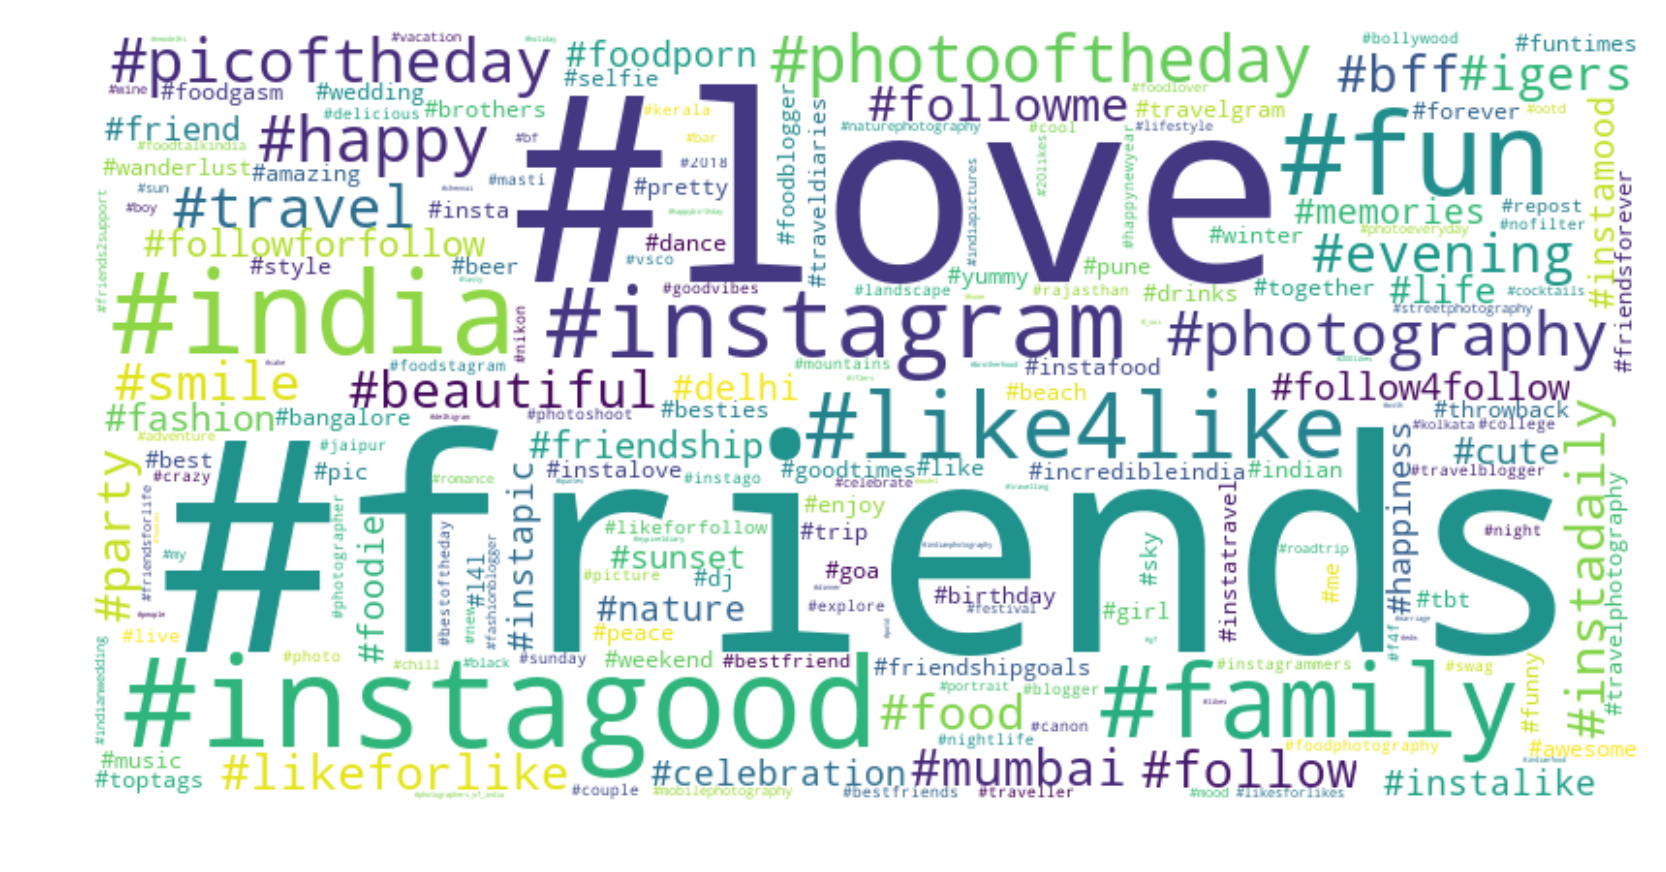

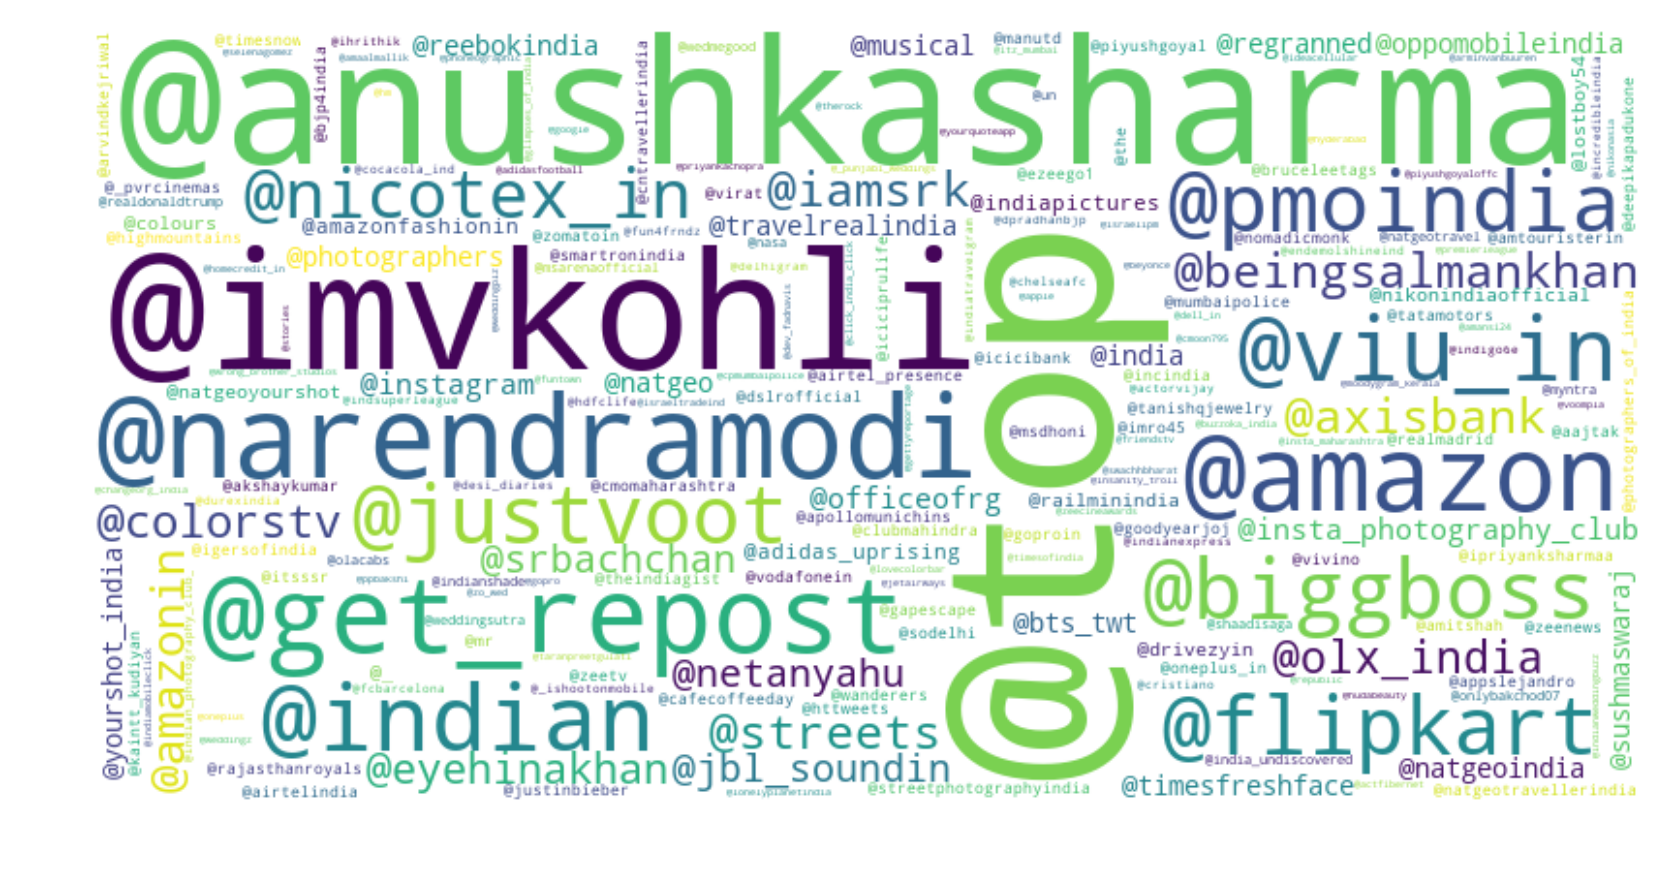

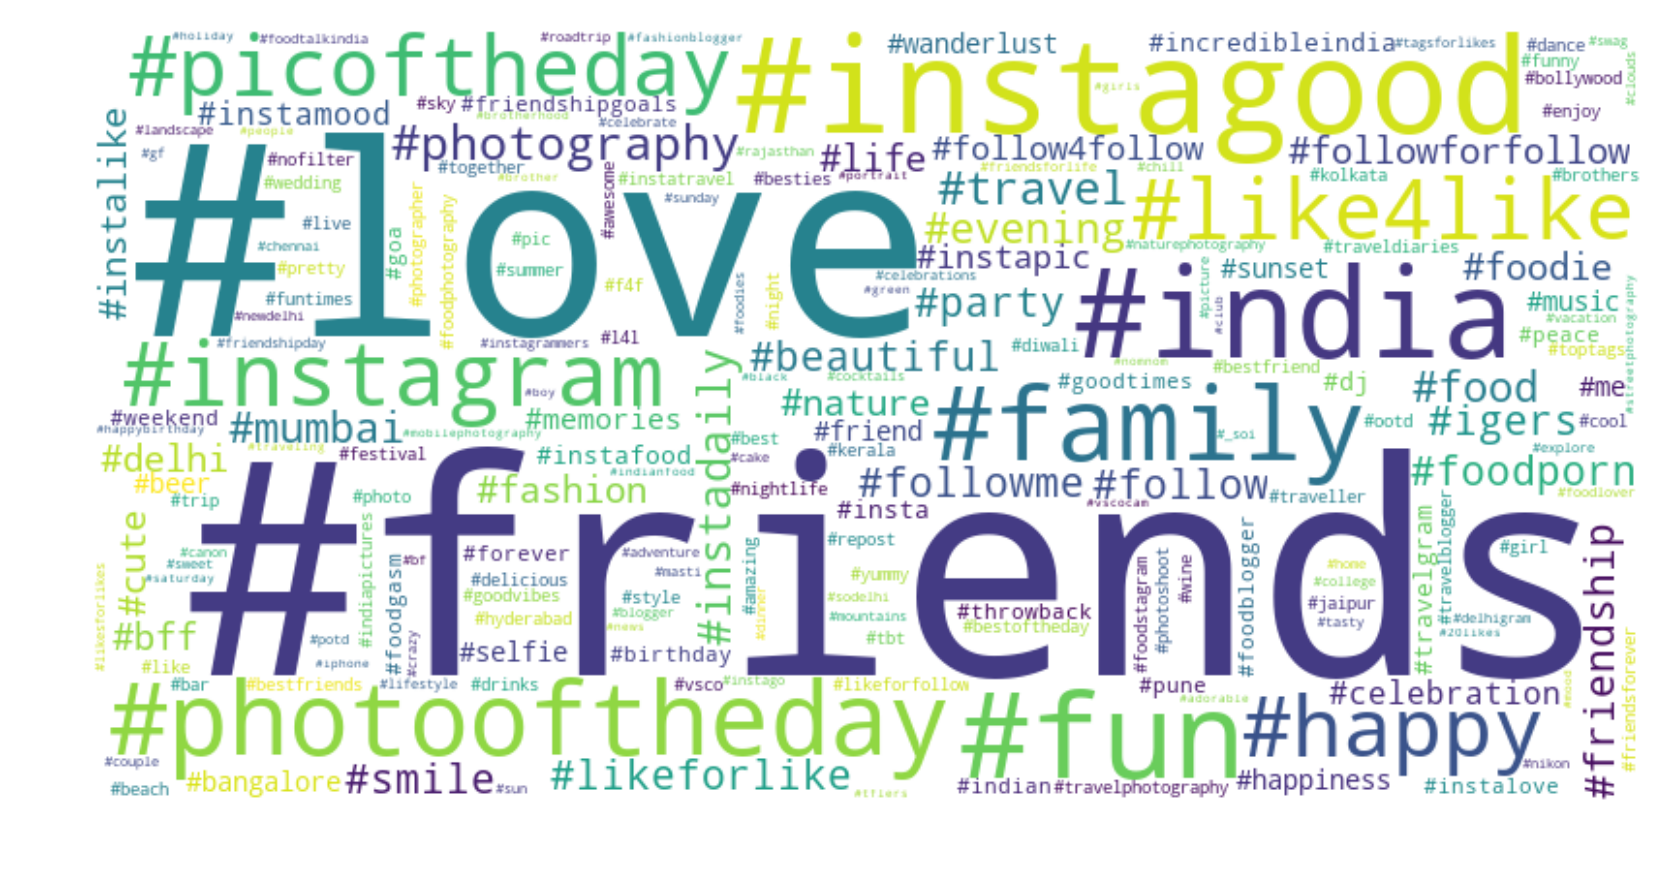

In [9]:
#------------------------------------------------------------------------------
# Master code :
### Load files (csv and excel)
### do basic stats
### do LDA
### do output
#------------------------------------------------------------------------------

for d in range(1,len(data_dir)): #for each directory
    print(d)

    # Necessary elements for LDA and output
    if data_dir[d][-3:-1]=='FR':
        lang='french'
    else:
        lang='english'

    title = data_dir[d].split(" - ", 1)[1]
    print(title)

    writer = pd.ExcelWriter(os.getcwd()+'/Resultats/' + enterprise_name + '_result_' + title + '.xlsx',
                                 engine='xlsxwriter',
                                 options={'strings_to_urls': False})


    # Load files
    df = load_file(data_dir, d)


    #data_samples = df['fulltext'].str.encode('utf8').tolist()
    data_samples = df['fulltext'].tolist()
    
    
    df=emoji_tag(df,writer)

    # Post tagging if choice
    if is_tag==1:
        print('Start tagging post')
        list_var, df=kw_tag(df,lang)
        stats_tags(df, list_var, enterprise_name, title,writer)

    # BASIC STAT
    stats_descs(df, enterprise_name, title, writer)

    # LDA

    doc_topics, topics = do_lda(data_samples, lang, n_features, n_topics, n_top_words)

    doc_topics = pd.DataFrame(doc_topics)
    df['topic'] = doc_topics.idxmax(axis=1)
    topic_counts = df['topic'].value_counts()

    # OUTPUT

    #TODO : Rajouter pour chaque post la distribution des topics/le score par topic, plutôt que seulement un label du max de ces scores. Ca nous permettrait ensuite de calculer des distances inter-post.

    topics_tot=topics.join(topic_counts)
    topics_tot.to_excel(writer, sheet_name='desc_topic')

    # Export des posts avec gestion de l'écriture des urls dans excel

    list_var = ["impact", "topic", "pagetype", 'fulltext', 'fulltext_original', 'url', 'fullname', "author", "date",
                    'nb_hashtag', 'nb_mention', "emojis","cnt_distinct_emojis","cnt_emojis"]

    df[list_var].drop_duplicates().to_excel(writer, sheet_name='post')

    writer.save()

    #TODO : Nettoyage de la mémoire
